In [1]:
import os 
from glob import glob

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# change dir to project dir
if 'changed' not in globals():
    os.chdir('../../../')
    changed = 1
    

In [2]:
outdir = 'results/motif_pairs/summary/'
os.makedirs(outdir, exist_ok=True)

In [3]:
# output directory for simulations
mp_data_dir = 'results/motif_pairs/Motif_Pairs_100000_only_chr/temp/'
glob_path = mp_data_dir + '{SAMPLE_NAME}/Q_values_sig.top_50_count.tsv'
fns = glob(glob_path.format(SAMPLE_NAME='*'))

In [4]:
data = []
for fn in fns:

    sample_name = fn.split('/')[-2]
    tdf = pd.read_table(fn)
    tdf['sample_name'] = sample_name
    data.append(tdf)

all_df = pd.concat(data)
all_df = all_df.loc[all_df['Q_value'] < 0.05]

In [5]:
# sort the pairs before working with them
def sort_pairs(sr):
    pairs_list = [sr.Motif1, sr.Motif2]
    return(sorted(pairs_list))
anchor_sorted_1, anchor_sorted_2 = zip(*all_df.apply(sort_pairs, axis=1))
all_df.loc[:, 'anchor_sorted_1'] = anchor_sorted_1
all_df.loc[:, 'anchor_sorted_2'] = anchor_sorted_2
all_df.loc[:, 'pair_sorted'] = all_df.loc[:, 'anchor_sorted_1'] + ',' + all_df.loc[:, 'anchor_sorted_2']

In [6]:
all_df.head()

,Motif1,Motif2,Sim_Count,P_value,Obs_Count,Contain_1,Contain_2,Q_value,sample_name,anchor_sorted_1,anchor_sorted_2,pair_sorted
0,TFAP2C,ZKSCAN5,45,0.00045,135,True,True,0.000660,Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sa...,TFAP2C,ZKSCAN5,"TFAP2C,ZKSCAN5"
1,RREB1,TCF4,46,0.00046,156,True,True,0.000665,Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sa...,RREB1,TCF4,"RREB1,TCF4"
2,E2F6,KLF2,96,0.00096,96,True,True,0.000979,Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sa...,E2F6,KLF2,"E2F6,KLF2"
3,KLF6,ZNF740,88,0.00088,118,True,True,0.000938,Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sa...,KLF6,ZNF740,"KLF6,ZNF740"
4,ZNF454,ZNF740,90,0.00090,212,True,True,0.000944,Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sa...,ZNF454,ZNF740,"ZNF454,ZNF740"


### Summary of Motif Pairs

In [7]:
mp_grps = all_df.groupby(['pair_sorted']) 
mp_counts_ss = mp_grps.count()['Sim_Count'].to_frame()
mp_counts_ss.sort_values(['Sim_Count'], ascending=[True], inplace=True)

In [8]:
mp_counts_ss

,Sim_Count
pair_sorted,
"RARA::RXRG,ZNF701",1
"IKZF1,MEF2A",1
"ESRRA,IKZF1",1
"IKZF1,MAZ",1
"ESRRA,JUN",1
...,...
"EWSR1-FLI1,ZNF263",53
"EWSR1-FLI1,ZNF281",53
"EWSR1-FLI1,ZNF320",53


### Summary of 1D Motif

In [9]:
left_df = all_df.drop(['anchor_sorted_2'], axis=1).rename(columns={'anchor_sorted_1': 'Motif'})
right_df = all_df.drop(['anchor_sorted_1'], axis=1).rename(columns={'anchor_sorted_2': 'Motif'})
oned_motif_df = pd.concat([left_df, right_df])

In [10]:
oned_motif_df.head()

,Motif1,Motif2,Sim_Count,P_value,Obs_Count,Contain_1,Contain_2,Q_value,sample_name,Motif,pair_sorted
0,TFAP2C,ZKSCAN5,45,0.00045,135,True,True,0.000660,Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sa...,TFAP2C,"TFAP2C,ZKSCAN5"
1,RREB1,TCF4,46,0.00046,156,True,True,0.000665,Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sa...,RREB1,"RREB1,TCF4"
2,E2F6,KLF2,96,0.00096,96,True,True,0.000979,Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sa...,E2F6,"E2F6,KLF2"
3,KLF6,ZNF740,88,0.00088,118,True,True,0.000938,Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sa...,KLF6,"KLF6,ZNF740"
4,ZNF454,ZNF740,90,0.00090,212,True,True,0.000944,Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sa...,ZNF454,"ZNF454,ZNF740"


In [11]:
motif_grps = oned_motif_df.groupby(['Motif']) 
motif_counts_ss = motif_grps.count()['Sim_Count'].to_frame()
motif_counts_ss.sort_values(['Sim_Count'], ascending=[True], inplace=True)

In [12]:
motif_counts_ss

,Sim_Count
Motif,
RARA::RXRA,49
RARA::RXRG,50
RARA,53
ONECUT1,63
NFIB,65
...,...
ZNF135,2785
PRDM9,2785
SP5,2785


#### Making a jointplot of the motif-pair frequencies for different sample sets 

In [13]:
# extract the counts for the current set
a_plus_counts = mp_counts_ss

# take the top n only
topn = 30
a_plus_counts = a_plus_counts.sort_values('Sim_Count', ascending=False).iloc[0:topn]

# convert the index into two columns and sort 
left_anchors, right_anchors = list(zip(*map(lambda x: x.split(','), a_plus_counts.index)))
a_plus_counts['anchor_sorted_1'] = left_anchors
a_plus_counts['anchor_sorted_2'] = right_anchors
a_plus_counts.sort_values(['anchor_sorted_1', 'anchor_sorted_1'], ascending=[True, True], inplace=True)

# add reverse in order to have a symmetric matrix after pivoting 
a_plus_counts_rev = a_plus_counts.rename(columns={'anchor_sorted_1': 'anchor_sorted_2', 'anchor_sorted_2': 'anchor_sorted_1'})
a_plus_counts = pd.concat([a_plus_counts, a_plus_counts_rev])

# pivot the data into matrix for and fillna
a_plus_counts_matrix = a_plus_counts.pivot_table(index='anchor_sorted_2', columns='anchor_sorted_1', values='Sim_Count', fill_value=0)
#a_plus_counts_matrix.fillna(0, inplace=True)

# reverse the index values 
rev_index = list(reversed(sorted(a_plus_counts_matrix.index)))
a_plus_counts_matrix = a_plus_counts_matrix.loc[rev_index]

a_plus_counts_matrix.shape

(18, 18)

In [14]:
# calculate frequencies for the column panel
col_idxs = a_plus_counts_matrix.columns.tolist()
col_oned_motif_counts = motif_counts_ss.loc[col_idxs].reset_index()

# calculate frequencies for the row panel
row_idxs = a_plus_counts_matrix.index.tolist()
row_oned_motif_counts = a_plus_counts_matrix.sum().loc[row_idxs].to_frame().reset_index()
row_oned_motif_counts.columns = ['Motif', 'topn_freq']

# calculating the number 
num_a_samples = all_df.drop_duplicates(['sample_name']).shape[0]

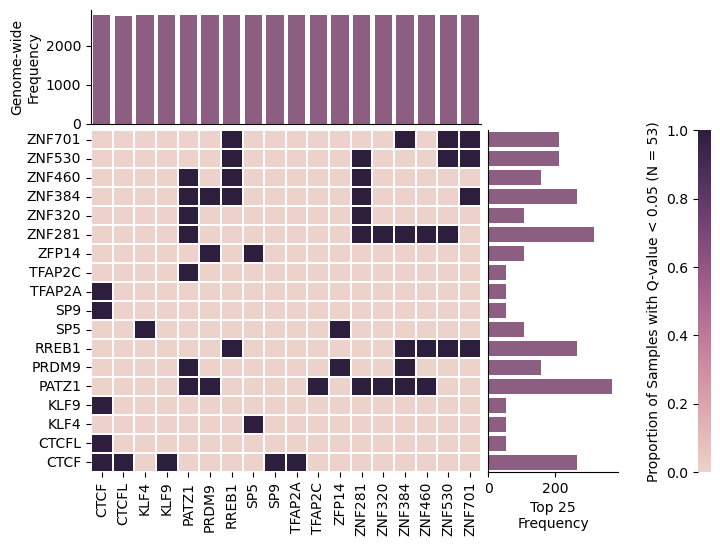

In [15]:
fig = plt.figure(figsize=(8, 6))

hspace = 0.03
wspace = 0.05

purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# making the gridspec and separating each piece
grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

top_panel = fig.add_subplot(grid[0, 0])
large_box = fig.add_subplot(grid[1, 0])

right_panel = fig.add_subplot(grid[1, 1])
legend_panel = fig.add_subplot(grid[1, 3])

# drawing a heatmap in the large box
#sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
sns.heatmap(a_plus_counts_matrix / num_a_samples, robust=False, ax=large_box, 
            xticklabels=True, yticklabels=True,
            cbar=True, cbar_ax=legend_panel, 
            cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
            cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
large_box.set(xlabel='', ylabel='')

# drawing a barplot of 1D motif frequencies across the whole genome
sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
sns.despine(ax=top_panel, right=True, top=True)

# drawing a barplot of 1D motif frequencies across the top 25 motif pairs
sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
sns.despine(ax=right_panel, right=True, top=True)

# save the figure 
fn = os.path.join(outdir, 'motif_pair_distributions.V1.png')
fig.savefig(fn, dpi=600, bbox_inches='tight')